<a href="https://colab.research.google.com/github/Vigneshthanga/SpecialTopics/blob/master/Assignment-4/Meta_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries

In [1]:
import os
import glob
from PIL import Image
import numpy as np

## Import tensorflow v1

In [2]:
!pip install tensorflow==1.12.0
import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 83.1MB 42kB/s 
     |████████████████████████████████| 3.1MB 33.5MB/s 
     |████████████████████████████████| 51kB 9.2MB/s 
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

1.12.0


## Mount google drive to access data

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Visualizing sample images of omniglot data from some of the languages

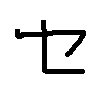

In [4]:
Image.open('/content/drive/MyDrive/images_background/Japanese_(katakana)/character13/0608_01.png')

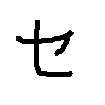

In [5]:
Image.open('/content/drive/MyDrive/images_background/Japanese_(katakana)/character13/0608_13.png')

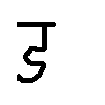

In [6]:
Image.open('/content/drive/MyDrive/images_background/Sanskrit/character13/0863_09.png')

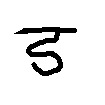

In [7]:
Image.open('/content/drive/MyDrive/images_background/Sanskrit/character13/0863_13.png')

## Convert image to numpy array

In [8]:
image_name = '/content/drive/MyDrive/images_background/Sanskrit/character13/0863_13.png'
alphabet, character, rotation = 'Sanskrit/character13/rot000'.split('/')
rotation = float(rotation[3:])

In [9]:
np.array(Image.open(image_name).rotate(rotation).resize((28, 28)), np.float32,copy=True)

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1

## Load train.txt file to prepare the training data

In [10]:
root_dir = '/content/drive/MyDrive/images_background/'

In [11]:
train_split_path = os.path.join(root_dir, 'train.txt')

with open(train_split_path, 'r') as train_split:
    train_classes = [line.rstrip() for line in train_split.readlines()]

## Get the total number of classes

In [12]:
no_of_classes = len(train_classes)

## Number of samples and Image dimension 

In [13]:
num_examples = 20
img_width = 28
img_height = 28
channels = 1

## Convert all images to numpy arrays

In [14]:
train_dataset = np.zeros([no_of_classes, num_examples, img_height, img_width], dtype=np.float32)

In [15]:
for label, name in enumerate(train_classes):
    alphabet, character, rotation = name.split('/')
    rotation = float(rotation[3:])
    img_dir = os.path.join(root_dir, 'data', alphabet, character)
    img_files = sorted(glob.glob(os.path.join(img_dir, '*.png')))
  
    
    for index, img_file in enumerate(img_files):
        values = 1. - np.array(Image.open(img_file).rotate(rotation).resize((img_width, img_height)), np.float32, copy=False)
        train_dataset[label, index] = values

In [16]:
train_dataset.shape

(4112, 20, 28, 28)

## Convolution Block

In [17]:
def convolution_block(inputs, out_channels, name='conv'):

    conv = tf.layers.conv2d(inputs, out_channels, kernel_size=3, padding='SAME')
    conv = tf.contrib.layers.batch_norm(conv, updates_collections=None, decay=0.99, scale=True, center=True)
    conv = tf.nn.relu(conv)
    conv = tf.contrib.layers.max_pool2d(conv, 2)
    
    return conv

## Utility function to get embeddings

In [18]:
def get_embeddings(support_set, h_dim, z_dim, reuse=False):

        net = convolution_block(support_set, h_dim)
        net = convolution_block(net, h_dim)
        net = convolution_block(net, h_dim) 
        net = convolution_block(net, z_dim) 
        net = tf.contrib.layers.flatten(net)
        
        return net

## We know that we are not going to use the entire sample for training as this is a n-way k-shot learning (few shot learning). N be 60 and k be 5.

In [19]:
#number of classes
num_way = 60  

#number of examples per class for support set
num_shot = 5  

#number of query points
num_query = 5 

#number of examples
num_examples = 20

h_dim = 64
z_dim = 64

## Prepare support set and query set

In [20]:
support_set = tf.placeholder(tf.float32, [None, None, img_height, img_width, channels])
query_set = tf.placeholder(tf.float32, [None, None, img_height, img_width, channels])

In [21]:
support_set_shape = tf.shape(support_set)
query_set_shape = tf.shape(query_set)

In [22]:
num_classes, num_support_points = support_set_shape[0], support_set_shape[1]

In [23]:
num_query_points = query_set_shape[1]

## Convert the lable one-hot encoded vector

In [24]:
y = tf.placeholder(tf.int64, [None, None])
y_one_hot = tf.one_hot(y, depth=num_classes)

In [25]:
support_set_embeddings = get_embeddings(tf.reshape(support_set, [num_classes * num_support_points, img_height, img_width, channels]), h_dim, z_dim)

In [26]:
embedding_dimension = tf.shape(support_set_embeddings)[-1]
class_prototype = tf.reduce_mean(tf.reshape(support_set_embeddings, [num_classes, num_support_points, embedding_dimension]), axis=1)

In [27]:
query_set_embeddings = get_embeddings(tf.reshape(query_set, [num_classes * num_query_points, img_height, img_width, channels]), h_dim, z_dim, reuse=True)

## Utility function to calculate Eucledian distance

In [28]:
def euclidean_distance(a, b):
    N, D = tf.shape(a)[0], tf.shape(a)[1]
    M = tf.shape(b)[0]
    a = tf.tile(tf.expand_dims(a, axis=1), (1, M, 1))
    b = tf.tile(tf.expand_dims(b, axis=0), (N, 1, 1))
    return tf.reduce_mean(tf.square(a - b), axis=2)

## Calculate the distance between the class prototype and query set embeddings:


In [29]:
distance = euclidean_distance(class_prototype,query_set_embeddings)

## Get predicted probability as a softmax of distance

In [30]:
predicted_probability = tf.reshape(tf.nn.log_softmax(-distance), [num_classes, num_query_points, -1])

## Claculate loss

In [31]:
loss = -tf.reduce_mean(tf.reshape(tf.reduce_sum(tf.multiply(y_one_hot, predicted_probability), axis=-1), [-1]))

## Calculate accuracy

In [32]:
accuracy = tf.reduce_mean(tf.to_float(tf.equal(tf.argmax(predicted_probability, axis=-1), y)))

## Adam Optimizer

In [33]:
train = tf.train.AdamOptimizer().minimize(loss)

## Weight initialization

In [34]:
sess = tf.InteractiveSession()
init = tf.global_variables_initializer()
sess.run(init)

## Model hyper-parameters

In [35]:
num_epochs = 5
num_episodes = 100

## Training

In [36]:
for epoch in range(num_epochs):
    
    for episode in range(num_episodes):
        
        # select 60 classes
        episodic_classes = np.random.permutation(no_of_classes)[:num_way]
        
        support = np.zeros([num_way, num_shot, img_height, img_width], dtype=np.float32)
        
        query = np.zeros([num_way, num_query, img_height, img_width], dtype=np.float32)
        
        
        for index, class_ in enumerate(episodic_classes):
            selected = np.random.permutation(num_examples)[:num_shot + num_query]
            support[index] = train_dataset[class_, selected[:num_shot]]
            
            # 5 querypoints per classs
            query[index] = train_dataset[class_, selected[num_shot:]]
            
        support = np.expand_dims(support, axis=-1)
        query = np.expand_dims(query, axis=-1)
        labels = np.tile(np.arange(num_way)[:, np.newaxis], (1, num_query)).astype(np.uint8)
        _, loss_, accuracy_ = sess.run([train, loss, accuracy], feed_dict={support_set: support, query_set: query, y:labels})
        
        if (episode+1) % 10 == 0:
            print('Epoch {} : Episode {} : Loss: {}, Accuracy: {}'.format(epoch+1, episode+1, loss_, accuracy_))

Epoch 1 : Episode 10 : Loss: 5.703781604766846, Accuracy: 0.01666666753590107
Epoch 1 : Episode 20 : Loss: 5.703781604766846, Accuracy: 0.01666666753590107
Epoch 1 : Episode 30 : Loss: 5.703781604766846, Accuracy: 0.01666666753590107
Epoch 1 : Episode 40 : Loss: 5.703781604766846, Accuracy: 0.01666666753590107
Epoch 1 : Episode 50 : Loss: 5.703781604766846, Accuracy: 0.01666666753590107
Epoch 1 : Episode 60 : Loss: 5.703781604766846, Accuracy: 0.01666666753590107
Epoch 1 : Episode 70 : Loss: 5.703781604766846, Accuracy: 0.01666666753590107
Epoch 1 : Episode 80 : Loss: 5.703781604766846, Accuracy: 0.01666666753590107
Epoch 1 : Episode 90 : Loss: 5.703781604766846, Accuracy: 0.01666666753590107
Epoch 1 : Episode 100 : Loss: 5.703781604766846, Accuracy: 0.01666666753590107
Epoch 2 : Episode 10 : Loss: 5.703781604766846, Accuracy: 0.01666666753590107
Epoch 2 : Episode 20 : Loss: 5.703781604766846, Accuracy: 0.01666666753590107
Epoch 2 : Episode 30 : Loss: 5.703781604766846, Accuracy: 0.016